In [1]:
import CCD_packages
import rcca
import numpy as pd
%pylab inline

/home/jmuraskin/miniconda/envs/cpac040/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



Populating the interactive namespace from numpy and matplotlib


In [2]:
GroupDF,motionInfo=CCD_packages.getCCDSubjectData(saveMotionInfo=False)

No DR .txt file found or error for subject : CCD061
No DR .txt file found or error for subject : CCD061


In [3]:
goodsubj,badsubj = CCD_packages.getSubjectList(GroupDF=GroupDF,motionThresh=1,poor_performer=14)

In [4]:
columnNames=[]
for n in range(10):
    columnNames.append('RSN%s' % n)

In [18]:
training=[]
testing=[]
fb_array=[]
subj_array=[]
for subj in goodsubj:
    for fb in ['FEEDBACK','NOFEEDBACK']:
        subj_array.append(subj)
        fb_array.append(fb)
        tmp_data=GroupDF[np.all([GroupDF.Subject_ID==subj,GroupDF.FB==fb],axis=0)][columnNames]
        nSamples=tmp_data.shape[0]
        training.append(tmp_data.values[:nSamples/2,:])
        testing.append(tmp_data.values[nSamples/2:,:])

In [15]:
# Initialize a cca object as an instantiation of the CCACrossValidate class.
ccaCV = rcca.CCACrossValidate(kernelcca=False, numCCs = [1, 2, 3, 4, 5 , 6], regs = [0., 1e2, 1e4, 1e6])

# Use the train() and validate() methods to run the analysis and perform cross-dataset prediction.
ccaCV.train(training)
testcorrsCV = ccaCV.validate(testing)
ccaCV.compute_ev(testing)

Training CV CCA, regularization = 0.0000, 1 components, fold #1
Training CV CCA, regularization = 0.0000, 1 components, fold #2
Training CV CCA, regularization = 0.0000, 1 components, fold #3
Training CV CCA, regularization = 0.0000, 1 components, fold #4
Training CV CCA, regularization = 0.0000, 1 components, fold #5
Training CV CCA, regularization = 0.0000, 1 components, fold #6
Training CV CCA, regularization = 0.0000, 1 components, fold #7
Training CV CCA, regularization = 0.0000, 1 components, fold #8
Training CV CCA, regularization = 0.0000, 1 components, fold #9
Training CV CCA, regularization = 0.0000, 1 components, fold #10
Training CV CCA, regularization = 0.0000, 2 components, fold #1
Training CV CCA, regularization = 0.0000, 2 components, fold #2
Training CV CCA, regularization = 0.0000, 2 components, fold #3
Training CV CCA, regularization = 0.0000, 2 components, fold #4
Training CV CCA, regularization = 0.0000, 2 components, fold #5
Training CV CCA, regularization = 0.000

[array([[ 0.15028744,  0.46855356,  0.38763837,  0.42074931,  0.33257051,
          0.26873002,  0.30640548,  0.29287365,  0.19971439,  0.46352636],
        [ 0.12075271,  0.00060407,  0.45897179,  0.34479635,  0.15067776,
          0.19572936,  0.2613109 ,  0.08704794,  0.39542174,  0.44241381],
        [ 0.10477689,  0.21286957,  0.18333457,  0.43116288,  0.24544135,
          0.44967143,  0.43356029,  0.24219264,  0.36773343,  0.44381622]]),
 array([[ 0.2780986 ,  0.27529073,  0.41530069,  0.47316812,  0.49021377,
          0.23471096,  0.41583759,  0.45016006,  0.50690959,  0.27140916],
        [ 0.49961993,  0.13016287,  0.49912642,  0.32880123,  0.3291256 ,
          0.40412388,  0.27894959,  0.2387495 ,  0.42169901,  0.15562914],
        [ 0.04450613,  0.54545627,  0.5128359 ,  0.50204984,  0.360813  ,
          0.05301218,  0.29632313,  0.44426807,  0.06178545,  0.40643224]]),
 array([[ 0.31804038,  0.11615082,  0.26167143,  0.58360619,  0.49730041,
          0.28724996,  0.139

In [16]:
print 'Optimal number of components: %d\nOptimal regularization coefficient: %d' % (ccaCV.best_numCC, ccaCV.best_reg)

Optimal number of components: 3
Optimal regularization coefficient: 100


<Container object of 10 artists>

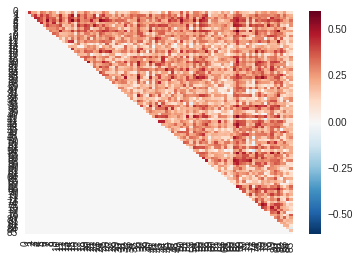

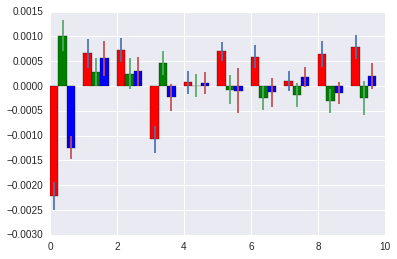

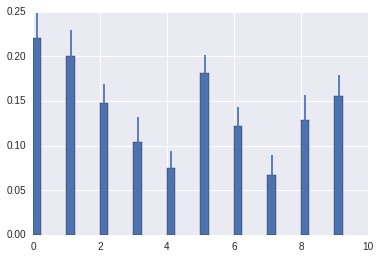

In [17]:
import seaborn as sns
sns.heatmap(ccaCV.cancorrs[0,:,:])
colors=['r','g','b']
ind=np.arange(10)
width=.25
plt.figure()
for j in range(3):
    plt.bar(ind+width*j,np.mean(ccaCV.ws,axis=0)[:,j],width=width,yerr=np.std(ccaCV.ws,axis=0)[:,j]/np.sqrt(len(goodsubj)),color=colors[j])
    
ind=np.arange(10)
width=.25
plt.figure()
plt.bar(ind,np.mean(ccaCV.corrs,axis=0),width=width,yerr=np.std(ccaCV.corrs,axis=0)/np.sqrt(len(goodsubj)))

In [21]:
np.shape(ccaCV.ws)

(86, 10, 3)

In [65]:
from nilearn import image,plotting
import os

foldername='/home/jmuraskin/Projects/CCD/working_v1/CCA_analysis/FB-NFB-output'
if not os.path.exists(foldername):
    os.makedirs(foldername)

for fb in ['FEEDBACK','NOFEEDBACK']:
    for subj in subj_array:
        scan=CCD_packages.fb_subjectinfo(subj,fb=='FEEDBACK')+1
        img=image.load_img('/home/jmuraskin/Projects/CCD/CPAC-out/pipeline_CCD_v1/%s_data_/dr_tempreg_maps_zstat_stack_to_standard_smooth/_scan_feedback_%d/_csf_threshold_0.96/_gm_threshold_0.7/_wm_threshold_0.96/_compcor_ncomponents_5_selector_pc10.linear1.wm0.global0.motion1.quadratic1.gm0.compcor1.csf1/_spatial_map_PNAS_Smith09_rsn10/_fwhm_6/temp_reg_map_z_antswarp_maths.nii.gz' % (subj,scan))
        data=img.get_data()
        dat=np.dot(data,ccaCV.ws[np.all([fb_array==fb,subj_array==subj],axis=0)][:,:])
        for j in range(3):
            newData=image.new_img_like(img,dat[:,:,:,j])
            newData.to_filename('%s/%s_%s_C%d.nii.gz' % (foldername,subj,fb,j))

In [63]:
fb_array

['FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEEDBACK',
 'FEEDBACK',
 'NOFEE